# Домашняя работа Полиномиальная регрессия и метрики близости (kNN)

ДАНИЛЬЧЕНКО ВАДИМ

Задание 1

Завершаем практическое задание №2. Необходимо для каждой распознанной фамилии вывести на экран наиболее подходящий вариант из стартового протокола

Задание 2

Постройте модель kNN для распознавания цифр. Посчитайте получившееся значение точности (последняя строка в файле 7. kNN digits.ipynb)

-------------------------------------------------------------------------------------------------------------------------------

In [10]:
import numpy as np
import pandas as pd
import Levenshtein

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets

### задание 1

In [4]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [5]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

In [7]:
# запишем в датафрейм все комбинации элементов, а также редакторское расстояние Левенштейна каждой пары
temp_list=[]
for recognized_name in speech_recognition:
    for real_name in claim_list:
        temp_list.append([recognized_name, real_name, Levenshtein.distance(recognized_name, real_name)])
    
import pandas as pd
train_df=pd.DataFrame(temp_list)
train_df.columns=['recognized_name', 'real_name', 'dist']
train_df.sort_values(by='dist', inplace=True)
train_df.head()

,recognized_name,real_name,dist
19,рычихина наталья,Гречихина Наталья,3
35,чистова анастасия,Чистякова Анастасия,4
4,кучменко она,Кущенко Анна,5
15,груздь алина,Груздева Алина,5
10,кущенко оксана,Кущенко Анна,5


In [8]:
# выведем комбинации с минимальным количество изменений, необходимых для преобразования одного в другое
real_names=[]
for name in speech_recognition:
    real_names.append(train_df[train_df.recognized_name==name].iloc[0])
    
pd.DataFrame(real_names)

,recognized_name,real_name,dist
4,кучменко она,Кущенко Анна,5
10,кущенко оксана,Кущенко Анна,5
15,груздь алина,Груздева Алина,5
19,рычихина наталья,Гречихина Наталья,3
24,шиховцева на,Шехавцова Анна,6
35,чистова анастасия,Чистякова Анастасия,4


при этом видим, что для Кущенко Анны 2 варианта, имеющих минимальное расстояние

### задание 2 

Загружаем данные

In [11]:
digits = datasets.load_digits()

Пример первой цифры

In [12]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [15]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

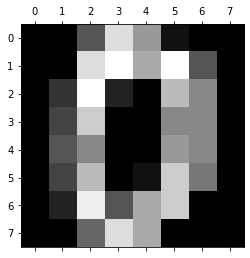

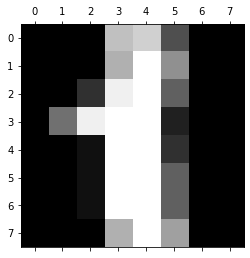

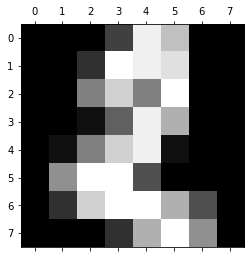

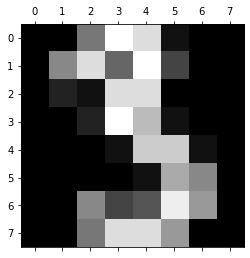

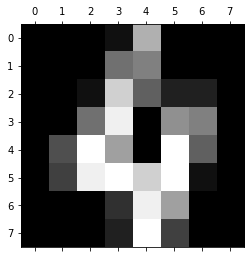

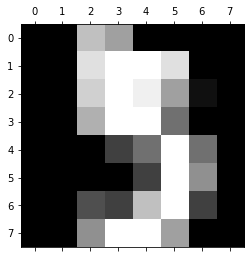

In [16]:
plt.gray()
for i in range(0, 6):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [17]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [18]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [19]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [20]:
X_train = X_digits[:split]
y_train = Y_digits[:split]

Формируем тестовую выборку и обучаем модель knn

In [21]:
X_test = X_digits[split:]
y_test = Y_digits[split:]

In [24]:
knn=KNeighborsClassifier(n_jobs=-1, n_neighbors=5).fit(X_train, y_train)

y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

print('----------- train ----------------')
print('accuracy: {}'.format(accuracy_score(np.array(y_train), np.round(y_train_pred))))
print('----------- test ----------------')
print('accuracy: {}'.format(accuracy_score(np.array(y_test), np.round(y_test_pred))))

----------- train ----------------
accuracy: 0.9901051329622759
----------- test ----------------
accuracy: 0.9611111111111111


In [26]:
knn.score( X_test, y_test )

0.9611111111111111